## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.611
Method:                 Least Squares   F-statistic:                              3241.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:08:22   Log-Likelihood:                         -15686.
No. Observations:               16512   AIC:                                  3.139e+04
Df Residuals:                   16504   BIC:                                  3.145e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

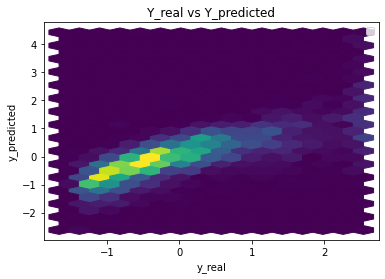

Performance Metrics
Mean Squared Error: 0.40502904972644366
Mean Absolute Error: 0.4645950376979951
Manhattan distance: 1917.8483156173256
Euclidean distance: 40.889606469991406


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3888709380774414


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9640396	total: 59.2ms	remaining: 59.1s
1:	learn: 0.9322366	total: 62ms	remaining: 30.9s
2:	learn: 0.9034960	total: 64.9ms	remaining: 21.6s
3:	learn: 0.8755121	total: 67.8ms	remaining: 16.9s
4:	learn: 0.8493400	total: 70.8ms	remaining: 14.1s
5:	learn: 0.8255062	total: 73.7ms	remaining: 12.2s
6:	learn: 0.8023064	total: 77.3ms	remaining: 11s
7:	learn: 0.7814782	total: 79.7ms	remaining: 9.89s
8:	learn: 0.7626513	total: 82.6ms	remaining: 9.09s
9:	learn: 0.7435831	total: 84.8ms	remaining: 8.4s
10:	learn: 0.7272846	total: 87.3ms	remaining: 7.85s
11:	learn: 0.7123965	total: 89.6ms	remaining: 7.38s
12:	learn: 0.6987721	total: 91.9ms	remaining: 6.97s
13:	learn: 0.6849198	total: 94ms	remaining: 6.62s
14:	learn: 0.6735229	total: 96.5ms	remaining: 6.34s
15:	learn: 0.6615503	total: 98.8ms	remaining: 6.08s
16:	learn: 0.6525005	total: 102ms	remaining: 5.9s
17:	learn: 0.6425071	total: 104ms	remaining: 5.7s
18:	learn: 0.6325052	total: 107ms	remaining: 5.53s
19:	

26:	learn: 0.5794124	total: 128ms	remaining: 4.6s
27:	learn: 0.5741317	total: 131ms	remaining: 4.53s
28:	learn: 0.5678467	total: 133ms	remaining: 4.46s
29:	learn: 0.5616982	total: 136ms	remaining: 4.39s
30:	learn: 0.5574637	total: 138ms	remaining: 4.32s
31:	learn: 0.5539988	total: 141ms	remaining: 4.26s
32:	learn: 0.5498610	total: 143ms	remaining: 4.19s
33:	learn: 0.5467505	total: 145ms	remaining: 4.13s
34:	learn: 0.5414852	total: 148ms	remaining: 4.07s
35:	learn: 0.5385497	total: 150ms	remaining: 4.02s
36:	learn: 0.5353049	total: 152ms	remaining: 3.96s
37:	learn: 0.5312599	total: 154ms	remaining: 3.91s
38:	learn: 0.5280658	total: 157ms	remaining: 3.86s
39:	learn: 0.5258806	total: 160ms	remaining: 3.83s
40:	learn: 0.5227491	total: 163ms	remaining: 3.82s
41:	learn: 0.5208685	total: 166ms	remaining: 3.78s
42:	learn: 0.5178998	total: 168ms	remaining: 3.74s
43:	learn: 0.5151082	total: 170ms	remaining: 3.7s
44:	learn: 0.5120057	total: 173ms	remaining: 3.67s
45:	learn: 0.5099092	total: 175ms

53:	learn: 0.4941746	total: 196ms	remaining: 3.43s
54:	learn: 0.4921899	total: 198ms	remaining: 3.41s
55:	learn: 0.4900306	total: 201ms	remaining: 3.39s
56:	learn: 0.4882262	total: 204ms	remaining: 3.37s
57:	learn: 0.4873246	total: 206ms	remaining: 3.34s
58:	learn: 0.4863983	total: 208ms	remaining: 3.32s
59:	learn: 0.4849783	total: 212ms	remaining: 3.32s
60:	learn: 0.4834781	total: 214ms	remaining: 3.3s
61:	learn: 0.4822127	total: 216ms	remaining: 3.27s
62:	learn: 0.4812824	total: 219ms	remaining: 3.25s
63:	learn: 0.4801367	total: 221ms	remaining: 3.23s
64:	learn: 0.4788848	total: 224ms	remaining: 3.22s
65:	learn: 0.4781166	total: 226ms	remaining: 3.2s
66:	learn: 0.4769536	total: 229ms	remaining: 3.19s
67:	learn: 0.4754854	total: 231ms	remaining: 3.17s
68:	learn: 0.4736565	total: 234ms	remaining: 3.16s
69:	learn: 0.4728396	total: 236ms	remaining: 3.14s
70:	learn: 0.4723272	total: 239ms	remaining: 3.12s
71:	learn: 0.4706601	total: 242ms	remaining: 3.12s
72:	learn: 0.4697823	total: 245ms

103:	learn: 0.4470343	total: 323ms	remaining: 2.78s
104:	learn: 0.4465478	total: 325ms	remaining: 2.77s
105:	learn: 0.4462409	total: 328ms	remaining: 2.77s
106:	learn: 0.4459068	total: 330ms	remaining: 2.76s
107:	learn: 0.4454609	total: 333ms	remaining: 2.75s
108:	learn: 0.4449609	total: 335ms	remaining: 2.74s
109:	learn: 0.4444305	total: 338ms	remaining: 2.73s
110:	learn: 0.4439539	total: 340ms	remaining: 2.72s
111:	learn: 0.4431269	total: 342ms	remaining: 2.71s
112:	learn: 0.4424613	total: 345ms	remaining: 2.71s
113:	learn: 0.4416862	total: 347ms	remaining: 2.7s
114:	learn: 0.4413666	total: 350ms	remaining: 2.69s
115:	learn: 0.4410821	total: 352ms	remaining: 2.68s
116:	learn: 0.4406009	total: 355ms	remaining: 2.68s
117:	learn: 0.4399448	total: 358ms	remaining: 2.67s
118:	learn: 0.4393149	total: 360ms	remaining: 2.67s
119:	learn: 0.4388196	total: 363ms	remaining: 2.66s
120:	learn: 0.4383394	total: 366ms	remaining: 2.66s
121:	learn: 0.4379903	total: 368ms	remaining: 2.65s
122:	learn: 0

130:	learn: 0.4335918	total: 392ms	remaining: 2.6s
131:	learn: 0.4331738	total: 394ms	remaining: 2.59s
132:	learn: 0.4325206	total: 397ms	remaining: 2.58s
133:	learn: 0.4320777	total: 399ms	remaining: 2.58s
134:	learn: 0.4315616	total: 401ms	remaining: 2.57s
135:	learn: 0.4311343	total: 404ms	remaining: 2.56s
136:	learn: 0.4308656	total: 406ms	remaining: 2.56s
137:	learn: 0.4302511	total: 408ms	remaining: 2.55s
138:	learn: 0.4295245	total: 411ms	remaining: 2.55s
139:	learn: 0.4292312	total: 414ms	remaining: 2.54s
140:	learn: 0.4286657	total: 416ms	remaining: 2.54s
141:	learn: 0.4282823	total: 419ms	remaining: 2.53s
142:	learn: 0.4276930	total: 421ms	remaining: 2.52s
143:	learn: 0.4272893	total: 424ms	remaining: 2.52s
144:	learn: 0.4269818	total: 426ms	remaining: 2.51s
145:	learn: 0.4267969	total: 429ms	remaining: 2.51s
146:	learn: 0.4264666	total: 431ms	remaining: 2.5s
147:	learn: 0.4261414	total: 434ms	remaining: 2.5s
148:	learn: 0.4257237	total: 436ms	remaining: 2.49s
149:	learn: 0.4

181:	learn: 0.4105676	total: 520ms	remaining: 2.33s
182:	learn: 0.4099985	total: 522ms	remaining: 2.33s
183:	learn: 0.4096426	total: 524ms	remaining: 2.32s
184:	learn: 0.4092762	total: 526ms	remaining: 2.32s
185:	learn: 0.4088689	total: 529ms	remaining: 2.31s
186:	learn: 0.4085560	total: 531ms	remaining: 2.31s
187:	learn: 0.4081054	total: 533ms	remaining: 2.3s
188:	learn: 0.4076393	total: 536ms	remaining: 2.3s
189:	learn: 0.4073419	total: 538ms	remaining: 2.29s
190:	learn: 0.4070423	total: 540ms	remaining: 2.29s
191:	learn: 0.4067461	total: 543ms	remaining: 2.28s
192:	learn: 0.4064339	total: 545ms	remaining: 2.28s
193:	learn: 0.4061361	total: 547ms	remaining: 2.27s
194:	learn: 0.4057838	total: 550ms	remaining: 2.27s
195:	learn: 0.4055720	total: 552ms	remaining: 2.27s
196:	learn: 0.4052809	total: 555ms	remaining: 2.26s
197:	learn: 0.4050079	total: 557ms	remaining: 2.26s
198:	learn: 0.4047323	total: 560ms	remaining: 2.25s
199:	learn: 0.4043621	total: 562ms	remaining: 2.25s
200:	learn: 0.

209:	learn: 0.4013302	total: 587ms	remaining: 2.21s
210:	learn: 0.4009545	total: 590ms	remaining: 2.21s
211:	learn: 0.4007011	total: 593ms	remaining: 2.2s
212:	learn: 0.4004099	total: 595ms	remaining: 2.2s
213:	learn: 0.4001720	total: 597ms	remaining: 2.19s
214:	learn: 0.3998759	total: 600ms	remaining: 2.19s
215:	learn: 0.3996521	total: 602ms	remaining: 2.19s
216:	learn: 0.3992350	total: 605ms	remaining: 2.18s
217:	learn: 0.3989036	total: 607ms	remaining: 2.18s
218:	learn: 0.3985119	total: 610ms	remaining: 2.17s
219:	learn: 0.3982218	total: 612ms	remaining: 2.17s
220:	learn: 0.3978584	total: 615ms	remaining: 2.17s
221:	learn: 0.3976530	total: 618ms	remaining: 2.16s
222:	learn: 0.3972669	total: 620ms	remaining: 2.16s
223:	learn: 0.3969625	total: 622ms	remaining: 2.16s
224:	learn: 0.3967444	total: 625ms	remaining: 2.15s
225:	learn: 0.3964168	total: 627ms	remaining: 2.15s
226:	learn: 0.3960920	total: 630ms	remaining: 2.15s
227:	learn: 0.3957277	total: 632ms	remaining: 2.14s
228:	learn: 0.

260:	learn: 0.3869981	total: 714ms	remaining: 2.02s
261:	learn: 0.3867143	total: 717ms	remaining: 2.02s
262:	learn: 0.3863947	total: 719ms	remaining: 2.01s
263:	learn: 0.3861736	total: 722ms	remaining: 2.01s
264:	learn: 0.3859361	total: 725ms	remaining: 2.01s
265:	learn: 0.3857403	total: 727ms	remaining: 2s
266:	learn: 0.3855437	total: 729ms	remaining: 2s
267:	learn: 0.3852941	total: 732ms	remaining: 2s
268:	learn: 0.3850986	total: 734ms	remaining: 2s
269:	learn: 0.3846774	total: 737ms	remaining: 1.99s
270:	learn: 0.3843937	total: 739ms	remaining: 1.99s
271:	learn: 0.3842334	total: 742ms	remaining: 1.99s
272:	learn: 0.3839137	total: 744ms	remaining: 1.98s
273:	learn: 0.3833762	total: 747ms	remaining: 1.98s
274:	learn: 0.3831801	total: 749ms	remaining: 1.97s
275:	learn: 0.3829039	total: 751ms	remaining: 1.97s
276:	learn: 0.3827255	total: 754ms	remaining: 1.97s
277:	learn: 0.3823328	total: 756ms	remaining: 1.96s
278:	learn: 0.3819968	total: 759ms	remaining: 1.96s
279:	learn: 0.3817557	to

288:	learn: 0.3796458	total: 784ms	remaining: 1.93s
289:	learn: 0.3794772	total: 786ms	remaining: 1.92s
290:	learn: 0.3792615	total: 789ms	remaining: 1.92s
291:	learn: 0.3790149	total: 791ms	remaining: 1.92s
292:	learn: 0.3787480	total: 794ms	remaining: 1.92s
293:	learn: 0.3785369	total: 796ms	remaining: 1.91s
294:	learn: 0.3783859	total: 798ms	remaining: 1.91s
295:	learn: 0.3780114	total: 801ms	remaining: 1.91s
296:	learn: 0.3778132	total: 803ms	remaining: 1.9s
297:	learn: 0.3775465	total: 806ms	remaining: 1.9s
298:	learn: 0.3773845	total: 808ms	remaining: 1.89s
299:	learn: 0.3771215	total: 811ms	remaining: 1.89s
300:	learn: 0.3769557	total: 813ms	remaining: 1.89s
301:	learn: 0.3766849	total: 816ms	remaining: 1.89s
302:	learn: 0.3764737	total: 819ms	remaining: 1.88s
303:	learn: 0.3762139	total: 821ms	remaining: 1.88s
304:	learn: 0.3760602	total: 823ms	remaining: 1.88s
305:	learn: 0.3757160	total: 826ms	remaining: 1.87s
306:	learn: 0.3754584	total: 828ms	remaining: 1.87s
307:	learn: 0.

340:	learn: 0.3688410	total: 911ms	remaining: 1.76s
341:	learn: 0.3685821	total: 913ms	remaining: 1.76s
342:	learn: 0.3684469	total: 916ms	remaining: 1.75s
343:	learn: 0.3682455	total: 918ms	remaining: 1.75s
344:	learn: 0.3680715	total: 920ms	remaining: 1.75s
345:	learn: 0.3678728	total: 923ms	remaining: 1.74s
346:	learn: 0.3676785	total: 925ms	remaining: 1.74s
347:	learn: 0.3675634	total: 928ms	remaining: 1.74s
348:	learn: 0.3674123	total: 930ms	remaining: 1.73s
349:	learn: 0.3671827	total: 932ms	remaining: 1.73s
350:	learn: 0.3670424	total: 935ms	remaining: 1.73s
351:	learn: 0.3668313	total: 939ms	remaining: 1.73s
352:	learn: 0.3665816	total: 941ms	remaining: 1.72s
353:	learn: 0.3663551	total: 944ms	remaining: 1.72s
354:	learn: 0.3661770	total: 946ms	remaining: 1.72s
355:	learn: 0.3660457	total: 949ms	remaining: 1.72s
356:	learn: 0.3658675	total: 951ms	remaining: 1.71s
357:	learn: 0.3656833	total: 954ms	remaining: 1.71s
358:	learn: 0.3654860	total: 956ms	remaining: 1.71s
359:	learn: 

368:	learn: 0.3640646	total: 980ms	remaining: 1.68s
369:	learn: 0.3639597	total: 983ms	remaining: 1.67s
370:	learn: 0.3637848	total: 985ms	remaining: 1.67s
371:	learn: 0.3635932	total: 988ms	remaining: 1.67s
372:	learn: 0.3633934	total: 990ms	remaining: 1.66s
373:	learn: 0.3631964	total: 992ms	remaining: 1.66s
374:	learn: 0.3629901	total: 995ms	remaining: 1.66s
375:	learn: 0.3627941	total: 997ms	remaining: 1.65s
376:	learn: 0.3626531	total: 1000ms	remaining: 1.65s
377:	learn: 0.3624263	total: 1s	remaining: 1.65s
378:	learn: 0.3622571	total: 1s	remaining: 1.65s
379:	learn: 0.3620547	total: 1.01s	remaining: 1.64s
380:	learn: 0.3619007	total: 1.01s	remaining: 1.64s
381:	learn: 0.3617572	total: 1.01s	remaining: 1.64s
382:	learn: 0.3616150	total: 1.01s	remaining: 1.63s
383:	learn: 0.3614081	total: 1.01s	remaining: 1.63s
384:	learn: 0.3612733	total: 1.02s	remaining: 1.63s
385:	learn: 0.3611172	total: 1.02s	remaining: 1.62s
386:	learn: 0.3609205	total: 1.02s	remaining: 1.62s
387:	learn: 0.360

420:	learn: 0.3551487	total: 1.11s	remaining: 1.52s
421:	learn: 0.3550123	total: 1.11s	remaining: 1.52s
422:	learn: 0.3547477	total: 1.11s	remaining: 1.52s
423:	learn: 0.3545661	total: 1.11s	remaining: 1.51s
424:	learn: 0.3544184	total: 1.12s	remaining: 1.51s
425:	learn: 0.3542712	total: 1.12s	remaining: 1.51s
426:	learn: 0.3540924	total: 1.12s	remaining: 1.5s
427:	learn: 0.3538869	total: 1.12s	remaining: 1.5s
428:	learn: 0.3537472	total: 1.13s	remaining: 1.5s
429:	learn: 0.3536278	total: 1.13s	remaining: 1.5s
430:	learn: 0.3534927	total: 1.13s	remaining: 1.5s
431:	learn: 0.3533211	total: 1.14s	remaining: 1.49s
432:	learn: 0.3531815	total: 1.14s	remaining: 1.49s
433:	learn: 0.3529379	total: 1.14s	remaining: 1.49s
434:	learn: 0.3527594	total: 1.14s	remaining: 1.48s
435:	learn: 0.3525933	total: 1.14s	remaining: 1.48s
436:	learn: 0.3524161	total: 1.15s	remaining: 1.48s
437:	learn: 0.3522554	total: 1.15s	remaining: 1.48s
438:	learn: 0.3519951	total: 1.15s	remaining: 1.47s
439:	learn: 0.351

448:	learn: 0.3505301	total: 1.18s	remaining: 1.44s
449:	learn: 0.3502583	total: 1.18s	remaining: 1.44s
450:	learn: 0.3501197	total: 1.18s	remaining: 1.44s
451:	learn: 0.3499843	total: 1.19s	remaining: 1.44s
452:	learn: 0.3498849	total: 1.19s	remaining: 1.43s
453:	learn: 0.3496438	total: 1.19s	remaining: 1.43s
454:	learn: 0.3495394	total: 1.19s	remaining: 1.43s
455:	learn: 0.3493708	total: 1.2s	remaining: 1.43s
456:	learn: 0.3492385	total: 1.2s	remaining: 1.42s
457:	learn: 0.3490535	total: 1.2s	remaining: 1.42s
458:	learn: 0.3489103	total: 1.2s	remaining: 1.42s
459:	learn: 0.3488011	total: 1.21s	remaining: 1.41s
460:	learn: 0.3485649	total: 1.21s	remaining: 1.41s
461:	learn: 0.3484154	total: 1.21s	remaining: 1.41s
462:	learn: 0.3483108	total: 1.21s	remaining: 1.41s
463:	learn: 0.3481543	total: 1.22s	remaining: 1.41s
464:	learn: 0.3480084	total: 1.22s	remaining: 1.4s
465:	learn: 0.3478223	total: 1.22s	remaining: 1.4s
466:	learn: 0.3476103	total: 1.22s	remaining: 1.4s
467:	learn: 0.34750

499:	learn: 0.3428681	total: 1.3s	remaining: 1.3s
500:	learn: 0.3426827	total: 1.31s	remaining: 1.3s
501:	learn: 0.3425726	total: 1.31s	remaining: 1.3s
502:	learn: 0.3424295	total: 1.31s	remaining: 1.3s
503:	learn: 0.3422870	total: 1.31s	remaining: 1.29s
504:	learn: 0.3420804	total: 1.32s	remaining: 1.29s
505:	learn: 0.3419681	total: 1.32s	remaining: 1.29s
506:	learn: 0.3418313	total: 1.32s	remaining: 1.28s
507:	learn: 0.3417000	total: 1.32s	remaining: 1.28s
508:	learn: 0.3416131	total: 1.33s	remaining: 1.28s
509:	learn: 0.3415170	total: 1.33s	remaining: 1.28s
510:	learn: 0.3413128	total: 1.33s	remaining: 1.28s
511:	learn: 0.3411760	total: 1.34s	remaining: 1.27s
512:	learn: 0.3410102	total: 1.34s	remaining: 1.27s
513:	learn: 0.3409239	total: 1.34s	remaining: 1.27s
514:	learn: 0.3407889	total: 1.34s	remaining: 1.27s
515:	learn: 0.3406136	total: 1.35s	remaining: 1.26s
516:	learn: 0.3404977	total: 1.35s	remaining: 1.26s
517:	learn: 0.3403936	total: 1.35s	remaining: 1.26s
518:	learn: 0.340

525:	learn: 0.3393935	total: 1.37s	remaining: 1.24s
526:	learn: 0.3392788	total: 1.37s	remaining: 1.23s
527:	learn: 0.3391190	total: 1.38s	remaining: 1.23s
528:	learn: 0.3390108	total: 1.38s	remaining: 1.23s
529:	learn: 0.3389330	total: 1.38s	remaining: 1.22s
530:	learn: 0.3388171	total: 1.38s	remaining: 1.22s
531:	learn: 0.3387469	total: 1.39s	remaining: 1.22s
532:	learn: 0.3385459	total: 1.39s	remaining: 1.22s
533:	learn: 0.3384534	total: 1.39s	remaining: 1.21s
534:	learn: 0.3383402	total: 1.39s	remaining: 1.21s
535:	learn: 0.3382083	total: 1.4s	remaining: 1.21s
536:	learn: 0.3380721	total: 1.4s	remaining: 1.21s
537:	learn: 0.3378925	total: 1.4s	remaining: 1.2s
538:	learn: 0.3378015	total: 1.4s	remaining: 1.2s
539:	learn: 0.3376969	total: 1.41s	remaining: 1.2s
540:	learn: 0.3376367	total: 1.41s	remaining: 1.2s
541:	learn: 0.3374403	total: 1.41s	remaining: 1.19s
542:	learn: 0.3373427	total: 1.41s	remaining: 1.19s
543:	learn: 0.3372214	total: 1.42s	remaining: 1.19s
544:	learn: 0.337054

577:	learn: 0.3328836	total: 1.5s	remaining: 1.1s
578:	learn: 0.3328290	total: 1.5s	remaining: 1.09s
579:	learn: 0.3327795	total: 1.51s	remaining: 1.09s
580:	learn: 0.3326857	total: 1.51s	remaining: 1.09s
581:	learn: 0.3325626	total: 1.51s	remaining: 1.09s
582:	learn: 0.3324048	total: 1.51s	remaining: 1.08s
583:	learn: 0.3323085	total: 1.52s	remaining: 1.08s
584:	learn: 0.3321416	total: 1.52s	remaining: 1.08s
585:	learn: 0.3320620	total: 1.52s	remaining: 1.07s
586:	learn: 0.3319439	total: 1.52s	remaining: 1.07s
587:	learn: 0.3318195	total: 1.53s	remaining: 1.07s
588:	learn: 0.3317727	total: 1.53s	remaining: 1.07s
589:	learn: 0.3316792	total: 1.53s	remaining: 1.06s
590:	learn: 0.3315481	total: 1.53s	remaining: 1.06s
591:	learn: 0.3313932	total: 1.54s	remaining: 1.06s
592:	learn: 0.3312904	total: 1.54s	remaining: 1.06s
593:	learn: 0.3312023	total: 1.54s	remaining: 1.05s
594:	learn: 0.3311071	total: 1.54s	remaining: 1.05s
595:	learn: 0.3309477	total: 1.55s	remaining: 1.05s
596:	learn: 0.3

603:	learn: 0.3300257	total: 1.57s	remaining: 1.03s
604:	learn: 0.3299217	total: 1.57s	remaining: 1.02s
605:	learn: 0.3298009	total: 1.57s	remaining: 1.02s
606:	learn: 0.3296967	total: 1.57s	remaining: 1.02s
607:	learn: 0.3295501	total: 1.58s	remaining: 1.02s
608:	learn: 0.3294332	total: 1.58s	remaining: 1.01s
609:	learn: 0.3292747	total: 1.58s	remaining: 1.01s
610:	learn: 0.3291869	total: 1.59s	remaining: 1.01s
611:	learn: 0.3290918	total: 1.59s	remaining: 1.01s
612:	learn: 0.3289951	total: 1.59s	remaining: 1s
613:	learn: 0.3288302	total: 1.59s	remaining: 1s
614:	learn: 0.3287271	total: 1.6s	remaining: 1s
615:	learn: 0.3285732	total: 1.6s	remaining: 998ms
616:	learn: 0.3284675	total: 1.6s	remaining: 995ms
617:	learn: 0.3283625	total: 1.61s	remaining: 993ms
618:	learn: 0.3282742	total: 1.61s	remaining: 990ms
619:	learn: 0.3281492	total: 1.61s	remaining: 987ms
620:	learn: 0.3280054	total: 1.61s	remaining: 985ms
621:	learn: 0.3279293	total: 1.62s	remaining: 982ms
622:	learn: 0.3278261	to

654:	learn: 0.3245009	total: 1.7s	remaining: 896ms
655:	learn: 0.3243865	total: 1.7s	remaining: 893ms
656:	learn: 0.3242692	total: 1.71s	remaining: 890ms
657:	learn: 0.3241544	total: 1.71s	remaining: 888ms
658:	learn: 0.3240357	total: 1.71s	remaining: 885ms
659:	learn: 0.3239153	total: 1.71s	remaining: 883ms
660:	learn: 0.3237716	total: 1.72s	remaining: 880ms
661:	learn: 0.3236618	total: 1.72s	remaining: 877ms
662:	learn: 0.3235881	total: 1.72s	remaining: 875ms
663:	learn: 0.3234853	total: 1.72s	remaining: 872ms
664:	learn: 0.3233624	total: 1.73s	remaining: 870ms
665:	learn: 0.3232750	total: 1.73s	remaining: 867ms
666:	learn: 0.3232417	total: 1.73s	remaining: 864ms
667:	learn: 0.3231376	total: 1.73s	remaining: 862ms
668:	learn: 0.3229999	total: 1.74s	remaining: 859ms
669:	learn: 0.3229070	total: 1.74s	remaining: 856ms
670:	learn: 0.3227115	total: 1.74s	remaining: 854ms
671:	learn: 0.3225886	total: 1.74s	remaining: 851ms
672:	learn: 0.3225046	total: 1.75s	remaining: 848ms
673:	learn: 0.

678:	learn: 0.3218780	total: 1.76s	remaining: 833ms
679:	learn: 0.3217456	total: 1.76s	remaining: 831ms
680:	learn: 0.3216324	total: 1.77s	remaining: 828ms
681:	learn: 0.3215519	total: 1.77s	remaining: 825ms
682:	learn: 0.3214134	total: 1.77s	remaining: 823ms
683:	learn: 0.3213238	total: 1.77s	remaining: 820ms
684:	learn: 0.3212644	total: 1.78s	remaining: 817ms
685:	learn: 0.3211815	total: 1.78s	remaining: 815ms
686:	learn: 0.3210806	total: 1.78s	remaining: 813ms
687:	learn: 0.3209577	total: 1.78s	remaining: 810ms
688:	learn: 0.3208482	total: 1.79s	remaining: 807ms
689:	learn: 0.3207788	total: 1.79s	remaining: 805ms
690:	learn: 0.3206424	total: 1.79s	remaining: 802ms
691:	learn: 0.3205071	total: 1.79s	remaining: 799ms
692:	learn: 0.3204311	total: 1.8s	remaining: 797ms
693:	learn: 0.3203690	total: 1.8s	remaining: 794ms
694:	learn: 0.3202792	total: 1.8s	remaining: 791ms
695:	learn: 0.3201475	total: 1.8s	remaining: 788ms
696:	learn: 0.3199843	total: 1.81s	remaining: 786ms
697:	learn: 0.31

732:	learn: 0.3164633	total: 1.9s	remaining: 690ms
733:	learn: 0.3163319	total: 1.9s	remaining: 688ms
734:	learn: 0.3162830	total: 1.9s	remaining: 685ms
735:	learn: 0.3161805	total: 1.9s	remaining: 683ms
736:	learn: 0.3160751	total: 1.91s	remaining: 680ms
737:	learn: 0.3159690	total: 1.91s	remaining: 678ms
738:	learn: 0.3158666	total: 1.91s	remaining: 676ms
739:	learn: 0.3157961	total: 1.92s	remaining: 673ms
740:	learn: 0.3157224	total: 1.92s	remaining: 671ms
741:	learn: 0.3156450	total: 1.92s	remaining: 668ms
742:	learn: 0.3155764	total: 1.92s	remaining: 665ms
743:	learn: 0.3154693	total: 1.93s	remaining: 663ms
744:	learn: 0.3153597	total: 1.93s	remaining: 660ms
745:	learn: 0.3152662	total: 1.93s	remaining: 657ms
746:	learn: 0.3151505	total: 1.93s	remaining: 655ms
747:	learn: 0.3150705	total: 1.94s	remaining: 652ms
748:	learn: 0.3150288	total: 1.94s	remaining: 649ms
749:	learn: 0.3148859	total: 1.94s	remaining: 647ms
750:	learn: 0.3147871	total: 1.94s	remaining: 645ms
751:	learn: 0.31

755:	learn: 0.3143677	total: 1.96s	remaining: 631ms
756:	learn: 0.3142680	total: 1.96s	remaining: 629ms
757:	learn: 0.3141493	total: 1.96s	remaining: 626ms
758:	learn: 0.3140907	total: 1.96s	remaining: 624ms
759:	learn: 0.3140204	total: 1.97s	remaining: 621ms
760:	learn: 0.3139432	total: 1.97s	remaining: 618ms
761:	learn: 0.3138548	total: 1.97s	remaining: 616ms
762:	learn: 0.3137519	total: 1.97s	remaining: 613ms
763:	learn: 0.3136477	total: 1.98s	remaining: 611ms
764:	learn: 0.3135746	total: 1.98s	remaining: 608ms
765:	learn: 0.3135102	total: 1.98s	remaining: 605ms
766:	learn: 0.3134171	total: 1.98s	remaining: 603ms
767:	learn: 0.3132770	total: 1.99s	remaining: 600ms
768:	learn: 0.3131698	total: 1.99s	remaining: 598ms
769:	learn: 0.3130810	total: 1.99s	remaining: 595ms
770:	learn: 0.3129577	total: 2s	remaining: 593ms
771:	learn: 0.3128336	total: 2s	remaining: 590ms
772:	learn: 0.3127647	total: 2s	remaining: 587ms
773:	learn: 0.3126992	total: 2s	remaining: 585ms
774:	learn: 0.3126380	to

810:	learn: 0.3095652	total: 2.09s	remaining: 488ms
811:	learn: 0.3094803	total: 2.09s	remaining: 485ms
812:	learn: 0.3094117	total: 2.1s	remaining: 482ms
813:	learn: 0.3093328	total: 2.1s	remaining: 480ms
814:	learn: 0.3091861	total: 2.1s	remaining: 477ms
815:	learn: 0.3091502	total: 2.1s	remaining: 475ms
816:	learn: 0.3090691	total: 2.11s	remaining: 472ms
817:	learn: 0.3090127	total: 2.11s	remaining: 470ms
818:	learn: 0.3089589	total: 2.11s	remaining: 467ms
819:	learn: 0.3088899	total: 2.12s	remaining: 464ms
820:	learn: 0.3088159	total: 2.12s	remaining: 462ms
821:	learn: 0.3087270	total: 2.12s	remaining: 459ms
822:	learn: 0.3086652	total: 2.12s	remaining: 457ms
823:	learn: 0.3085732	total: 2.13s	remaining: 454ms
824:	learn: 0.3084492	total: 2.13s	remaining: 451ms
825:	learn: 0.3083702	total: 2.13s	remaining: 449ms
826:	learn: 0.3083227	total: 2.13s	remaining: 446ms
827:	learn: 0.3082488	total: 2.13s	remaining: 444ms
828:	learn: 0.3081185	total: 2.14s	remaining: 441ms
829:	learn: 0.30

834:	learn: 0.3075994	total: 2.15s	remaining: 425ms
835:	learn: 0.3074782	total: 2.15s	remaining: 423ms
836:	learn: 0.3074183	total: 2.16s	remaining: 420ms
837:	learn: 0.3073545	total: 2.16s	remaining: 418ms
838:	learn: 0.3072620	total: 2.16s	remaining: 415ms
839:	learn: 0.3071713	total: 2.16s	remaining: 412ms
840:	learn: 0.3071332	total: 2.17s	remaining: 410ms
841:	learn: 0.3070291	total: 2.17s	remaining: 407ms
842:	learn: 0.3068817	total: 2.17s	remaining: 404ms
843:	learn: 0.3068505	total: 2.17s	remaining: 402ms
844:	learn: 0.3067810	total: 2.18s	remaining: 399ms
845:	learn: 0.3067461	total: 2.18s	remaining: 397ms
846:	learn: 0.3067055	total: 2.18s	remaining: 394ms
847:	learn: 0.3066638	total: 2.18s	remaining: 391ms
848:	learn: 0.3065973	total: 2.19s	remaining: 389ms
849:	learn: 0.3064905	total: 2.19s	remaining: 386ms
850:	learn: 0.3063857	total: 2.19s	remaining: 384ms
851:	learn: 0.3063115	total: 2.19s	remaining: 381ms
852:	learn: 0.3062456	total: 2.19s	remaining: 378ms
853:	learn: 

890:	learn: 0.3032766	total: 2.29s	remaining: 280ms
891:	learn: 0.3032202	total: 2.29s	remaining: 277ms
892:	learn: 0.3030987	total: 2.29s	remaining: 275ms
893:	learn: 0.3030180	total: 2.29s	remaining: 272ms
894:	learn: 0.3029541	total: 2.3s	remaining: 270ms
895:	learn: 0.3028942	total: 2.3s	remaining: 267ms
896:	learn: 0.3028053	total: 2.3s	remaining: 264ms
897:	learn: 0.3027220	total: 2.3s	remaining: 262ms
898:	learn: 0.3026051	total: 2.31s	remaining: 259ms
899:	learn: 0.3025044	total: 2.31s	remaining: 257ms
900:	learn: 0.3024429	total: 2.31s	remaining: 254ms
901:	learn: 0.3024109	total: 2.31s	remaining: 252ms
902:	learn: 0.3023108	total: 2.32s	remaining: 249ms
903:	learn: 0.3022753	total: 2.32s	remaining: 246ms
904:	learn: 0.3022063	total: 2.32s	remaining: 244ms
905:	learn: 0.3021428	total: 2.32s	remaining: 241ms
906:	learn: 0.3020633	total: 2.33s	remaining: 239ms
907:	learn: 0.3020119	total: 2.33s	remaining: 236ms
908:	learn: 0.3019250	total: 2.33s	remaining: 233ms
909:	learn: 0.30

914:	learn: 0.3014498	total: 2.35s	remaining: 218ms
915:	learn: 0.3013827	total: 2.35s	remaining: 216ms
916:	learn: 0.3012900	total: 2.35s	remaining: 213ms
917:	learn: 0.3012360	total: 2.35s	remaining: 210ms
918:	learn: 0.3011486	total: 2.36s	remaining: 208ms
919:	learn: 0.3010426	total: 2.36s	remaining: 205ms
920:	learn: 0.3009879	total: 2.36s	remaining: 203ms
921:	learn: 0.3008898	total: 2.37s	remaining: 200ms
922:	learn: 0.3008223	total: 2.37s	remaining: 198ms
923:	learn: 0.3006419	total: 2.37s	remaining: 195ms
924:	learn: 0.3005809	total: 2.37s	remaining: 192ms
925:	learn: 0.3005146	total: 2.38s	remaining: 190ms
926:	learn: 0.3004155	total: 2.38s	remaining: 187ms
927:	learn: 0.3002834	total: 2.38s	remaining: 185ms
928:	learn: 0.3002143	total: 2.38s	remaining: 182ms
929:	learn: 0.3001733	total: 2.38s	remaining: 180ms
930:	learn: 0.3000754	total: 2.39s	remaining: 177ms
931:	learn: 0.3000251	total: 2.39s	remaining: 174ms
932:	learn: 0.2999591	total: 2.39s	remaining: 172ms
933:	learn: 

968:	learn: 0.2972045	total: 2.48s	remaining: 79.5ms
969:	learn: 0.2971394	total: 2.49s	remaining: 76.9ms
970:	learn: 0.2970725	total: 2.49s	remaining: 74.3ms
971:	learn: 0.2970169	total: 2.49s	remaining: 71.8ms
972:	learn: 0.2968454	total: 2.49s	remaining: 69.2ms
973:	learn: 0.2967708	total: 2.5s	remaining: 66.6ms
974:	learn: 0.2966643	total: 2.5s	remaining: 64.1ms
975:	learn: 0.2965981	total: 2.5s	remaining: 61.5ms
976:	learn: 0.2965388	total: 2.5s	remaining: 58.9ms
977:	learn: 0.2964816	total: 2.51s	remaining: 56.4ms
978:	learn: 0.2964205	total: 2.51s	remaining: 53.9ms
979:	learn: 0.2963359	total: 2.51s	remaining: 51.3ms
980:	learn: 0.2962036	total: 2.52s	remaining: 48.7ms
981:	learn: 0.2961071	total: 2.52s	remaining: 46.2ms
982:	learn: 0.2960449	total: 2.52s	remaining: 43.6ms
983:	learn: 0.2959910	total: 2.52s	remaining: 41ms
984:	learn: 0.2959440	total: 2.52s	remaining: 38.5ms
985:	learn: 0.2958796	total: 2.53s	remaining: 35.9ms
986:	learn: 0.2957819	total: 2.53s	remaining: 33.3ms

991:	learn: 0.2953736	total: 2.54s	remaining: 20.5ms
992:	learn: 0.2953214	total: 2.54s	remaining: 17.9ms
993:	learn: 0.2952309	total: 2.55s	remaining: 15.4ms
994:	learn: 0.2951293	total: 2.55s	remaining: 12.8ms
995:	learn: 0.2950479	total: 2.55s	remaining: 10.3ms
996:	learn: 0.2950118	total: 2.56s	remaining: 7.69ms
997:	learn: 0.2949730	total: 2.56s	remaining: 5.13ms
998:	learn: 0.2949107	total: 2.56s	remaining: 2.56ms
999:	learn: 0.2948592	total: 2.56s	remaining: 0us
Mean Squared error 0.1500765238263208


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.0036873290305757
